# 평균 이동

- 중심을 군집의 중심응로 지속적으로 움직이면서 군집화를 수행(K-평균과 유사)
- 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수(일반적으로 KDE를 이용)가 피크인 점을 군집중심점으로 선정

확률밀도함수(Probability density function)

- 밀도추정(density estimation)의 방법은 크게 parametric 방법과 non-parametric 방법으로 구분 가능
- Non-parametric 밀도추정(density estimation) : 순수 관측 데이터만으로 확률밀도함수(pdf)를 추정
- Non-parametric 밀도추정의 가장 간단한 형태 : 히스토그램(histogram)

![](https://t1.daumcdn.net/cfile/tistory/22480C4A54EFF49103)
(히스토그램 밀도추정 (https://darkpgmr.tistory.com/147))

히스토그램의 문제점

1. binary의 경계에서 불연속성이 나타남
2. binary의 크기 및 시작위치에 따라 히스토그램이 달라짐
3. 고차원(high-dim) 데이터에 메모리 문제

KDE : Kernel function를 통해 어떤 변수의 확률 밀도 함수를 추정
- Kernel function : 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수
- https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use
- https://en.wikipedia.org/wiki/Kernel_density_estimation


- 관측된 데이터 각각마다 해당 데이터 값을 중심으로 하는 커널 함수를 생성한다:$K(x-x_i)$ (대표적인 커널함수로 가우시안분포 함수 사용)

- 이렇게 만들어진 커널 함수들을 모두 더한 후 전체 데이터 개수로 나눔.

가우시안커널의 계산식 : ![](https://t1.daumcdn.net/cfile/tistory/99926E455D73D95F0D)

커널함수로 가우시안분포 함수를 사용한 KDE : ![](https://t1.daumcdn.net/cfile/tistory/252C253454EC412B18)

ex) https://bab2min.tistory.com/637

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/Comparison_of_1D_bandwidth_selectors.png/220px-Comparison_of_1D_bandwidth_selectors.png)

(정규분포를 따르는 100개의 랜덤 샘플에 대한 다양한 bandwidth에 대한 KDE 결과, 회색: 실제 밀도/빨간색: h=0.05/검정색: h=0.337 from wikipedia)

- 대역폭이 클수록 : 평활화된 KDE --> 적은 수의 군집 중심점을 가짐.
- 대역폭이 작을수록 : 많은 수의 군집 중심점을 가짐.
- 대역폭의 크기에 따라 군집화를 진행 --> 대역폭 크기 설정이 군집화의 품질에 큰 영향을 줌.

최적의 대역폭 계산 : estimate_bandwidth()

$h=(\frac{4\sigma^5}{3n})^{\frac{1}{5}}\approx 1.06\sigma n^{-1/5}$ (단, $n$은 샘플 데이터의 개수, $\sigma$는 샘플 데이터의 표준편차)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


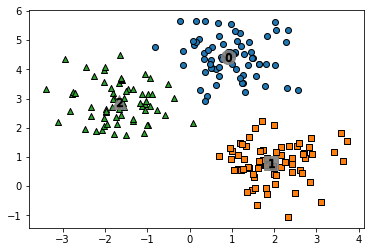

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
